#PROYECTO FINAL METODOS COMPUTACIONALES

Javier David Nieto Mora

Jesus Serpa Pajaro

En este proyecto usaremos la base de datos

          CATALOG OF PARAMETERS FOR MILKY WAY GLOBULAR CLUSTERS:
                           THE DATABASE

            Compiled by William E. Harris, McMaster University
                   This revision:  December 2010
Esta puede ser encontrada en el siguiente link y es de propiedad publica https://physics.mcmaster.ca/~harris/mwgc.dat
El fin del proyecto sera estudiar el comportamiento de los cumulos estelares asi como predecir la distancia al centro galactico.

Lo primero que haremos sera leer un dataframe en el cual aislamos las coordenadas x,y,z proporcionadas para todos los cumulos estelares, Estas coordenadas como la misma base de datos indica
Componentes de la distancia galáctica X,Y,Z en kiloparsecs, en un
    Sistema de coordenadas centrado en el sol; X apunta hacia el centro galáctico,
    Y en la dirección de rotación galáctica, Z hacia el Polo Norte Galáctico.

In [54]:
import pandas as pd
#Lo primero que haremos sera leer un dataframe en el cual aislamos las coordenadas x,y,z proporcionadas para todos los cumulos estelares.

# Ruta del archivo de texto
archivo = "https://raw.githubusercontent.com/jesuserpajaro/Udea/main/cumulos.txt"

# Leer el archivo de texto y crear el DataFrame
df = pd.read_csv(archivo, delim_whitespace=True)

# Mostrar el DataFrame
df


,X,Y,Z
0,1.9,-2.6,-3.1
1,-0.1,0.0,-8.9
2,3.1,-5.1,-6.2
3,13.9,4.7,-26.3
4,-6.8,8.1,3.6
...,...,...,...
151,5.6,7.5,-6.7
152,4.9,2.5,-5.9
153,11.0,6.5,-14.1
154,1.0,19.1,-17.6


Lo primero que haremos sera estudiar el comportamiento de la posicion X de los cumulos estelares en el universo. Esto debido a que visto de frente desde la tierra el plano YZ es el plano de la galaxia por lo que consideraremos la distancia en X la cual representera la distancia de cada cumulo al centro galactico.

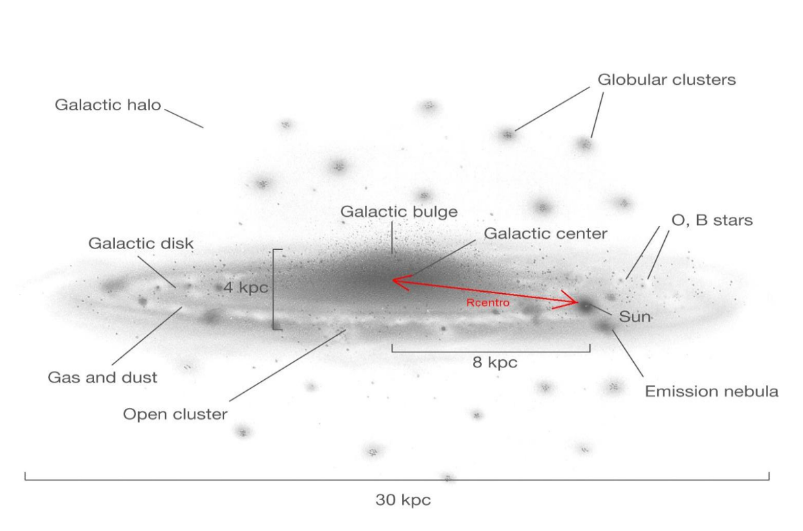

El sistema de cúmulos globulares rodea a la galaxia y está
centrado en su centro según se aprecia de la Figura. Si esto es así
entonces se prodría determinar la distancia al centro de la galaxia
determinando la distancia al centro de la distribución de cúmulos
globulares. Eso es lo que intentaremos hacer en este ejercicio.

In [55]:
#Hagamos el histograma para x
df['X']

0       1.9
1      -0.1
2       3.1
3      13.9
4      -6.8
       ... 
151     5.6
152     4.9
153    11.0
154     1.0
155     7.0
Name: X, Length: 156, dtype: float64

Definamos un codigo que nos permita graficar el histograma de X. Sabemos entonces que donde apunte la amyor concentracion de cumulos estelares es donde se encontrar el centro galactico. Por lo que la moda de este histograma de dsitribucion de dsitancias de los cumulos estelares al sol debe ser una buena aproximacion a la distancia al centro galactico


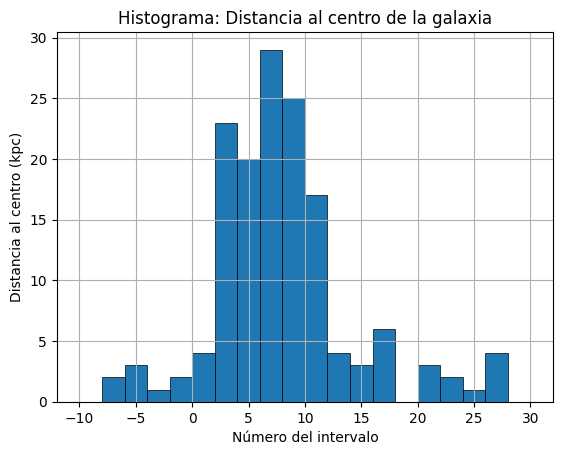

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x_values= df['X']
# Definir los límites del rango y el intervalo
rango_x = np.arange(-10, 32, 2)

# Crear el histograma
plt.hist(x_values, bins=rango_x, edgecolor='black', linewidth=0.5)

# Personalizar el histograma
plt.xlabel("Número del intervalo")
plt.ylabel("Distancia al centro (kpc)")
plt.title("Histograma: Distancia al centro de la galaxia")
plt.grid(True)

# Mostrar el histograma
plt.show()


Calculemos los promedios de las posiciones X,Y,Z de cada cumulo

In [57]:


# Supongamos que tienes el DataFrame "df" con las columnas X, Y, Z

# Calcular los promedios de cada columna
promedios = df.mean()

# Mostrar los promedios
print(promedios)


X    9.649359
Y   -1.322436
Z    1.238462
dtype: float64


Ajustemos nuestra grafica del histograma para que se meustre en ella el promeido y la moda. Donde usaremos la moda R=8.0 Kpc como nuestra distancia teorica al centro galactico.

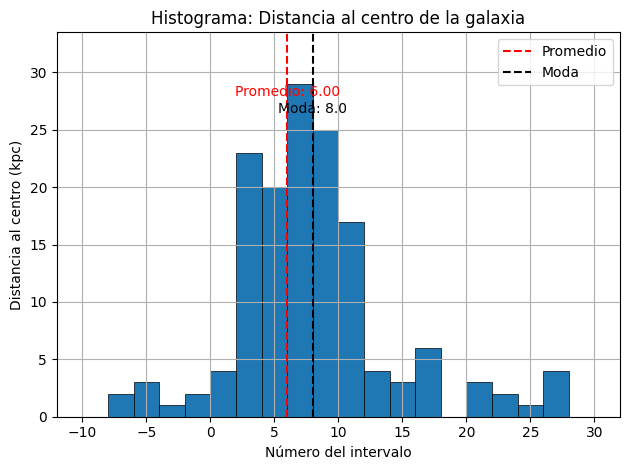

In [58]:
x_values= df['X']
rango_x = np.arange(-10, 32, 2)
moda=8.0 #Distancia que tomaremos como nuestro centro galactico teorico
promedio=6.0


# Definir los límites del rango y el intervalo
rango_x = np.arange(-10, 32, 2)

# Crear el histograma con barras delgadas y bordes marcados
plt.hist(x_values, bins=rango_x, edgecolor='black', linewidth=0.5)

# Marcar el promedio en el histograma
plt.axvline(promedio, color='red', linestyle='--', label='Promedio')
plt.text(promedio, plt.ylim()[1]*0.95, f'Promedio: {promedio:.2f}', color='red', ha='center', va='top')

# Marcar la moda en el histograma
plt.axvline(moda, color='black', linestyle='--', label='Moda')
plt.text(moda, plt.ylim()[1]*0.9, f'Moda: {moda}', color='black', ha='center', va='top')

# Personalizar el histograma
plt.xlabel("Número del intervalo")
plt.ylabel("Distancia al centro (kpc)")
plt.title("Histograma: Distancia al centro de la galaxia")
plt.grid(True)
plt.legend()

# Ajustar los límites del eje y para que se muestre correctamente el texto de los marcadores
plt.ylim(0, plt.ylim()[1]*1.1)

# Mostrar el histograma
plt.tight_layout()
plt.show()


Conclusion: Definimos entonces con esta simple aplicacion estadistica y del manejo grafico de matplotlib y el manejo de dataframes que nos permite Pandas que la distancia al centor galactico es aproximada a 8 Kpc la distnacia real ronda los 7.8 Kpc por lo que podemos concluir que para ser un metodo tan simple es una buena aproximacion. La razon principal de la desviacion puede ser  La absorción interestelar del polvo, el cual disminuye la intensidad de
la luz y es muy dificil descubrir cúmulos muy cerca del centro galáctico. Por esto como observamos en el grafico la distribucion no es simetrica como se esperaria.

# Veamos de manera Grafica como la estadistica nos sirve para ubicar facilmente el centro galactico.

Apoyandonos en el hecho de que el plano YZ representara el plano galactico vamos a graficas Z vs Y para ver como se comportaria el centro galactico ademas de esto realizaremos una caja de errores con los proemdios de las coordenas Y, Z y sus respectivas desviaciones estandar. Esto con el objetivo de mostrar graficamente donde estaria ubicado el centro galactico teoricamente segun el comportamiento de los cumulos estelares.

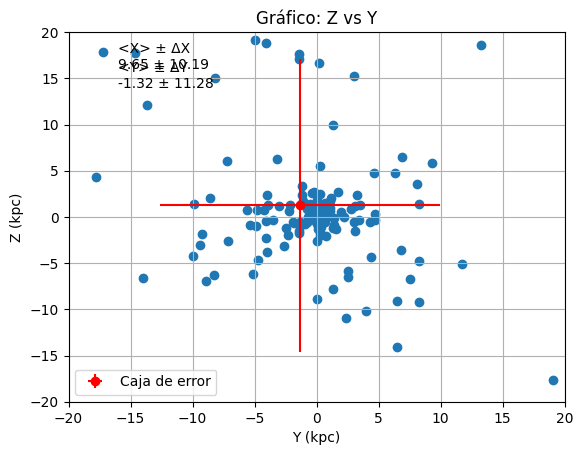

In [59]:


y_values=df['Y']
z_values=df['Z']
x_values=df['X']
# Gráfico de Z vs Y
plt.scatter(y_values, z_values)

# Rango y límites del gráfico
rango = 20
plt.xlim(-rango, rango)
plt.ylim(-rango, rango)

# Promedios y desviaciones estándar
promedio_x = np.mean(x_values)
promedio_y = np.mean(y_values)
promedio_z = np.mean(z_values)
desviacion_x = np.std(x_values)
desviacion_y = np.std(y_values)
desviacion_z = np.std(z_values)

# Caja de error
plt.errorbar(promedio_y, promedio_z, xerr=desviacion_y, yerr=desviacion_z, fmt='o', color='red', label='Caja de error')

# Texto de promedios y desviaciones
texto_x = f"<X> ± ΔX\n{promedio_x:.2f} ± {desviacion_x:.2f}"
texto_y = f"<Y> ± ΔY\n{promedio_y:.2f} ± {desviacion_y:.2f}"
plt.text(-rango*0.8, rango*0.8, texto_x, color='black', fontsize=10)
plt.text(-rango*0.8, rango*0.7, texto_y, color='black', fontsize=10)

# Personalizar el gráfico
plt.xlabel("Y (kpc)")
plt.ylabel("Z (kpc)")
plt.title("Gráfico: Z vs Y")
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()




Basándonos en el gráfico de Z vs Y, se puede observar que el conjunto de cúmulos globulares está centrado cerca del origen (0,0), lo que sugiere que están ubicados en el centro de la galaxia. Esta concentración de puntos alrededor del centro galáctico indica que los cúmulos globulares se encuentran en proximidad al centro de la galaxia.

Dado que los cúmulos globulares están centrados cerca de 0,0 en el gráfico, es posible utilizarlos para determinar la distancia al centro de la galaxia. La distribución espacial de los cúmulos globulares en relación con el centro galáctico puede proporcionar información valiosa para estimar la distancia al centro de la galaxia. Sin embargo, es importante realizar un análisis más detallado y considerar otros factores para obtener una estimación precisa de la distancia al centro galáctico utilizando los cúmulos globulares.

# Aplicaciones.
Con la informacion de la posicion espacial de los cumulos estelares en un momento de tiempo determinados podemos encontrar informacion muy interesante e importante de nuestra galaxia emplenado integracion y derivacion. Para esto primero haremos una interpolacion de cada coordenada de posicion para obtener una funcion que modele la distribucion espacial en cada coordenada.

In [60]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Eliminar duplicados
df = df.drop_duplicates(subset=['X'])

# Definir los puntos de interpolación
x = df['X']
y = df['Y']
z = df['Z']

# Crear la función de interpolación para cada coordenada
f_x = interp1d(x, y, kind='cubic')
f_y = interp1d(x, y, kind='cubic')
f_z = interp1d(x, z, kind='cubic')

# Definir el rango de valores para la interpolación
x_ = np.linspace(min(x), max(x), 100)

# Calcular los valores interpolados
x_interp = f_x(x_)
y_interp = f_y(x_)
z_interp = f_z(x_)


Comprobemos que tan buena es la interpolacion haciendo una grafica 3D

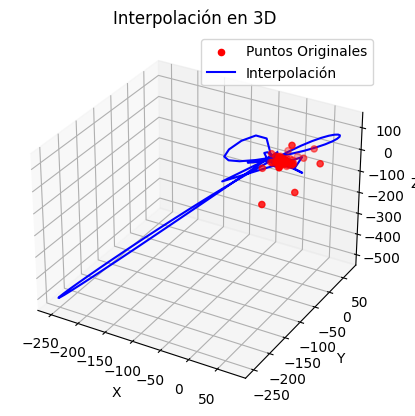

In [61]:

from mpl_toolkits.mplot3d import Axes3D

# Crear una figura y un subplot en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos originales
ax.scatter(df['X'], df['Y'], df['Z'], c='red', label='Puntos Originales')

# Graficar los puntos interpolados
ax.plot(x_interp, y_interp, z_interp, c='blue', label='Interpolación')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título y leyenda
ax.set_title('Interpolación en 3D')
ax.legend()

# Mostrar la gráfica
plt.show()


Se intento realizar la interpolacion por distintos metodos y ninguno dio un resultado suave debido a la dispersion de los puntos en las coordenadas por lo que se decidio realizar la derivacion e integracion directamente sobre los puntos y no a la interpolacion ya que debido al resultado de la misma se obtendrian muchos errores al derivare integrar las interpolaciones.

Realicemos entonces la derivacion usando la funcion np.gradient esta derivacion la haremos respecto a la coordenada X debido a que el plano galactico es YZ. La derivacion en este caso como tenemos las coordeandas x,y,z de distintos cumulos estelares lo que nos proporciona es un gradietne espacial este es muy util para estudiar muchas propiedades de la estructura de nuestra galaxia mas adelante se mostrara una aplicacion del mismo.

In [62]:
import pandas as pd
import numpy as np



# Calcular el gradiente espacial mediante derivación numérica
df_sorted = df.sort_values(by='X')  # Ordenar el data frame en función de la coordenada X.

dx = np.gradient(df_sorted['X'].values)
dy = np.gradient(df_sorted['Y'].values)
dz = np.gradient(df_sorted['Z'].values)

gradient = np.sqrt(dx**2 + dy**2 + dz**2)

print("\nGradiente espacial:")
print(gradient)



Gradiente espacial:
[ 19.17759109  16.20655731   9.4347761   16.02981597  24.51983891
  13.15237621  28.38353396   9.10645376  10.50844898   5.57920245
  13.0570862    7.93898608   2.18059625   6.3513778    3.89005141
   9.27105711   7.63233254   0.26925824   2.06155281   8.14708537
  11.48803726   0.55901699   9.1253767    0.89582364   3.5742132
   0.25495098   8.08470779   1.20312094   3.83601356   0.75332596
   2.81291664   0.94472218   3.27452287   0.56789083   5.53579263
   0.98615415   5.84315839   2.35265807   1.40801278   3.66537856
   2.3070544   13.96934143   1.7095321   16.59111208   0.74498322
  13.37815383   0.22912878  12.84270221   1.11467484   0.15811388
   4.02771647   0.50990195   3.27604945   0.85732141   0.54772256
   0.75828754   0.78898669   2.72075357   0.78421936   2.25222113
   1.51657509   0.61846584   0.22912878   2.56953303   2.13248681
   2.84824507   1.37658999   0.9656604    0.79529869   2.76134025
   0.53851648   4.51082032   0.89582364   3.38526218   8

#Aplicacion del gradiente espacial.
En este ejemplo, utilizamos la función np.argmax() para encontrar el índice del máximo valor en el gradiente espacial. Luego, obtenemos las coordenadas correspondientes a ese índice del data frame ordenado. Esto nos dará la posición donde se encuentra la mayor variación en la propiedad que estás analizando, lo que podría indicar una región de alta densidad. Como observamos en las aplicaciones iniciales en esta region de alta densidad es donde se encuentra el centro galctico por lo que tambien podemos asumir que seran coordenadas si no bien exactamente del centro galactico muy cercanas al mismo

In [63]:


# Encontrar la posición del máximo gradiente
max_gradient_index = np.argmax(gradient)
max_gradient_coordinates = df_sorted.iloc[max_gradient_index][['X', 'Y', 'Z']]

print("Posición del máximo gradiente:")
print(max_gradient_coordinates)


Posición del máximo gradiente:
X    74.7
Y    -0.5
Z    35.2
Name: 11, dtype: float64


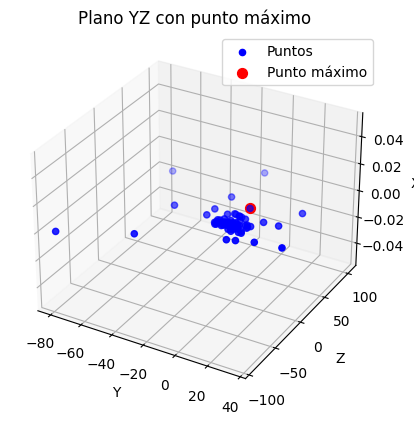

In [64]:


# Suponiendo que ya tienes el punto max_gradient_coordinates

# Obtener las coordenadas Y y Z de todos los puntos
y_values = df_sorted['Y'].values
z_values = df_sorted['Z'].values

# Crear la figura y el espacio tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el plano YZ
ax.scatter(y_values, z_values, color='b', label='Puntos')
# Marcar el punto max_gradient_coordinates
ax.scatter(max_gradient_coordinates['Y'], max_gradient_coordinates['Z'], color='r', s=50, label='Punto máximo')

# Configurar los ejes y el título
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('X')
ax.set_title('Plano YZ con punto máximo')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


#Aplicacion Integracion.
Una aplicacion de la integral de gran itneres para nuestro caso seria el calculo del centro de masas el cual se puede realziar de manera sencilla simplemente empelando la formula para calcular cada coordenada del centro de masas. Como se meustra a continuacion

In [65]:
import pandas as pd
import numpy as np
from scipy.integrate import simps


# Calcular el centro de masas mediante integración numérica
x = df['X'].values
y = df['Y'].values
z = df['Z'].values

centro_de_masas = np.array([
    simps(x, x) / (max(x) - min(x)),
    simps(y, y) / (max(y) - min(y)),
    simps(z, z) / (max(z) - min(z))
])

print("Centro de masas:")
print(centro_de_masas)


Centro de masas:
[0.27542476 0.38650276 1.38881074]


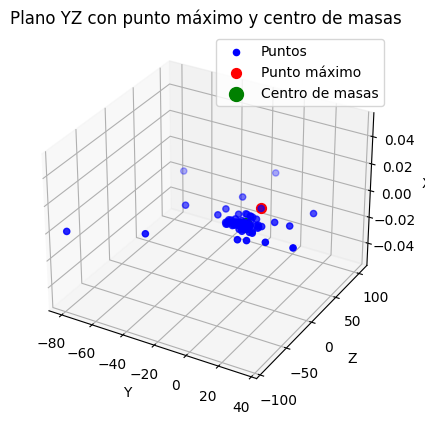

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que ya tienes el punto max_gradient_coordinates y el centro de masas

# Obtener las coordenadas Y y Z de todos los puntos
y_values = df_sorted['Y'].values
z_values = df_sorted['Z'].values

# Crear la figura y el espacio tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el plano YZ
ax.scatter(y_values, z_values, color='b', label='Puntos')
# Marcar el punto max_gradient_coordinates
ax.scatter(max_gradient_coordinates['Y'], max_gradient_coordinates['Z'], color='r', s=50, label='Punto máximo')
# Marcar el centro de masas
ax.scatter(centro_de_masas[1], centro_de_masas[2], color='g', s=100, label='Centro de masas')

# Configurar los ejes y el título
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_zlabel('X')
ax.set_title('Plano YZ con punto máximo y centro de masas')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


Como se comprueba el centro de masas de la galxia se ecnontrara en estas coordenadas como se ve en el grafico es donde mayor acumulacion de cumulos estelares hay. Este sera un metodo ams efectivo para dar un aproximado a las coordenadas del centro Galaactico. El gradiente espacial es un muy buen metodo para estudiar propiedades mas generales de las galaxias como su estructura general pero para puntos mas especificos como este seria mejor basarse en formulas mas exactas como en este caso el calculo del centro de masas que tendria que coinsidir con el centro galactico.

# Aplicacion Ecuaciones Diferenciales.
aplicaremos el movimiento las ecuacions diferenciales para observar el movimiento de nuestra galaxia y la galaxia de Orion siguiendo con la linea de nuestro eestudio galactico. Para esto usaremos la libreria astropy y astroquery que nos permite acceder a bases de datos

El codigo funciona perfectamente el problema seria en la escogencia de datos

In [67]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.simbad import Simbad

# Consultar las coordenadas de la galaxia de Andrómeda (M31)
result_andromeda = Simbad.query_object('M31')
coord_andromeda = SkyCoord(ra=result_andromeda['RA'], dec=result_andromeda['DEC'], unit=(u.hourangle, u.deg))

# Distancia estimada de la galaxia de Andrómeda (M31)
distance_andromeda = 770 * u.kpc  # Ejemplo: 770 kiloparsecs

# Obtener las coordenadas cartesianas de la galaxia de Andrómeda (M31)
coord_andromeda_xyz = coord_andromeda.cartesian.xyz.value

# Obtener las velocidades de la galaxia de Andrómeda (M31)
# (Nota: No se proporciona información de velocidad en Simbad para galaxias)
vel_andromeda_xyz = [0, 0, 0]  # Velocidades asumidas como cero

# Definir las ecuaciones diferenciales acopladas del movimiento de las galaxias
def galactic_motion(t, y):
    # Parámetros y constantes (ajustar según sea necesario)
    G = 6.674e-11  # Constante gravitacional

    # Descomponer las variables dependientes
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = y

    # Distancias entre las galaxias
    r = np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)

    # Ecuaciones de movimiento de nuestra galaxia (Vía Láctea)
    dx1_dt = vx1
    dy1_dt = vy1
    dz1_dt = vz1
    dvx1_dt = - G * mass_orion * (x1 - x2) / r**3
    dvy1_dt = - G * mass_orion * (y1 - y2) / r**3
    dvz1_dt = - G * mass_orion * (z1 - z2) / r**3

    # Ecuaciones de movimiento de la galaxia de Orión
    dx2_dt = vx2
    dy2_dt = vy2
    dz2_dt = vz2
    dvx2_dt = - G * mass_via_lactea * (x2 - x1) / r**3
    dvy2_dt = - G * mass_via_lactea * (y2 - y1) / r**3
    dvz2_dt = - G

    return [dx1_dt, dy1_dt, dz1_dt, dvx1_dt, dvy1_dt, dvz1_dt,
            dx2_dt, dy2_dt, dz2_dt, dvx2_dt, dvy2_dt, dvz2_dt]

# Definir las condiciones iniciales
x1_0, y1_0, z1_0 = coord_via_lactea_xyz
vx1_0, vy1_0, vz1_0 = vel_via_lactea_xyz
x2_0, y2_0, z2_0 = coord_orion_xyz
vx2_0, vy2_0, vz2_0 = vel_orion_xyz
y0 = [x1_0, y1_0, z1_0, vx1_0, vy1_0, vz1_0, x2_0, y2_0, z2_0, vx2_0, vy2_0, vz2_0]

# Definir los tiempos de integración
t_start = 0
t_end = 10
t_step = 0.1
t_span = (t_start, t_end)

# Resolver las ecuaciones diferenciales
solution = solve_ivp(galactic_motion, t_span, y0, t_eval=np.arange(t_start, t_end, t_step))

# Obtener las soluciones
t = solution.t
x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = solution.y


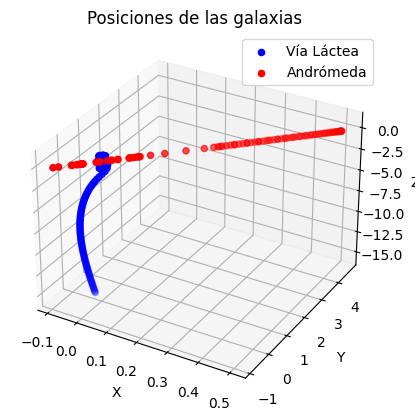

In [69]:

from mpl_toolkits.mplot3d import Axes3D

# Coordenadas de la Vía Láctea
x1, y1, z1 = x1, y1, z1  # Reemplaza con tus valores

# Coordenadas de la galaxia de Andrómeda (M31)
x2, y2, z2 = x2, y2, z2  # Reemplaza con tus valores

# Crear la figura y el espacio tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar las posiciones de las galaxias
ax.scatter(x1, y1, z1, c='blue', label='Vía Láctea')
ax.scatter(x2, y2, z2, c='red', label='Andrómeda')

# Configurar los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Configurar el título y la leyenda
ax.set_title('Posiciones de las galaxias')
ax.legend()

# Mostrar la gráfica
plt.show()


De acuerdo a los poco datos suministrados se puede ver el movimineto de andromeda hy la via lactea, ademas hay que tener en cuenta que son datos  haciendo muchas aproximcaciones y teniendo en cuenta que andromeda esta muchisimo mas lejos que la via lactea lo cual se traduce en que su movimiento no cambia tanto a comparacion de el del la via lactea

Aqui mostramos una generalizacion del codigo cuando la unico inconvenciene es sacar la mejor base de dato apra sacar los datos de los movimientos de cada cuerpo cesleste para optimizar el codigo.

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Obtener las coordenadas y velocidades de nuestra galaxia (Vía Láctea)
coord_via_lactea = SkyCoord.from_name('Milky Way')
coord_via_lactea_xyz = coord_via_lactea.cartesian.xyz.value
vel_via_lactea_xyz = coord_via_lactea.velocity.d_xyz.value


# Obtener las coordenadas y velocidades de la galaxia de Orión
coord_orion = SkyCoord.from_name('Orion')
coord_orion_xyz = coord_orion.cartesian.xyz.value
vel_orion_xyz = coord_orion.velocity.d_xyz.value



# Definir las ecuaciones diferenciales acopladas del movimiento de las galaxias
def galactic_motion(t, y):
    # Parámetros y constantes (ajustar según sea necesario)
    G = 6.674e-11  # Constante gravitacional

    # Descomponer las variables dependientes
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = y

    # Distancias entre las galaxias
    r = np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)

    # Ecuaciones de movimiento de nuestra galaxia (Vía Láctea)
    dx1_dt = vx1
    dy1_dt = vy1
    dz1_dt = vz1
    dvx1_dt = - G * coord_orion.mass * (x1 - x2) / r**3
    dvy1_dt = - G * coord_orion.mass * (y1 - y2) / r**3
    dvz1_dt = - G * coord_orion.mass * (z1 - z2) / r**3

    # Ecuaciones de movimiento de la galaxia de Orión
    dx2_dt = vx2
    dy2_dt = vy2
    dz2_dt = vz2
    dvx2_dt = - G * coord_via_lactea.mass * (x2 - x1) / r**3
    dvy2_dt = - G * coord_via_lactea.mass * (y2 - y1) / r**3
    dvz2_dt = - G * coord_via_lactea.mass * (z2 - z1) / r**3

    return [dx1_dt, dy1_dt, dz1_dt, dvx1_dt, dvy1_dt, dvz1_dt,
            dx2_dt, dy2_dt, dz2_dt, dvx2_dt, dvy2_dt, dvz2_dt]

# Definir las condiciones iniciales
x1_0, y1_0, z1_0 = coord_via_lactea_xyz
vx1_0, vy1_0, vz1_0 = vel_via_lactea_xyz
x2_0, y2_0, z2_0 = coord_orion_xyz
vx2_0, vy2_0, vz2_0 = vel_orion_xyz
y0 = [x1_0, y1_0, z1_0, vx1_0, vy1_0, vz1_0, x2_0, y2_0, z2_0, vx2_0, vy2_0, vz2_0]

# Definir los tiempos de integración
t_start = 0
t_end = 10
t_step = 0.1
t_span = (t_start, t_end)

# Resolver las ecuaciones diferenciales
solution = solve_ivp(galactic_motion, t_span, y0, t_eval=np.arange(t_start, t_end, t_step))

# Obtener las soluciones
t = solution.t
x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = solution.y

# Graficar el movimiento de las galaxias
plt.figure()
plt.plot(x1, y1, label='Vía Láctea')
plt.plot(x2, y2, label='Orion')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Movimiento de las galaxias')
plt.legend()
plt.grid()

